# Using Amazon Textract

- Documentation: https://textract.readthedocs.io/en/stable/python_package.html

- Code samples: https://github.com/aws-samples/amazon-textract-code-samples

- In case you need to install tesseract: https://textract.readthedocs.io/en/latest/installation.html

In [1]:
%%capture
#INCLUDING SCIENTIFIC AND NUMERICAL COMPUTING LIBRARIES
#Run this code to make sure that you have all the libraries at one go.
%pylab inline
import os
!pip install ipypublish
from ipypublish import nb_setup
import pandas as pd
%load_ext rpy2.ipython

In [2]:
# Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
os.chdir("drive/My Drive/Books_Writings/NLPBook/")

Mounted at /content/drive


## Sample Text in a JPEG file for OCR

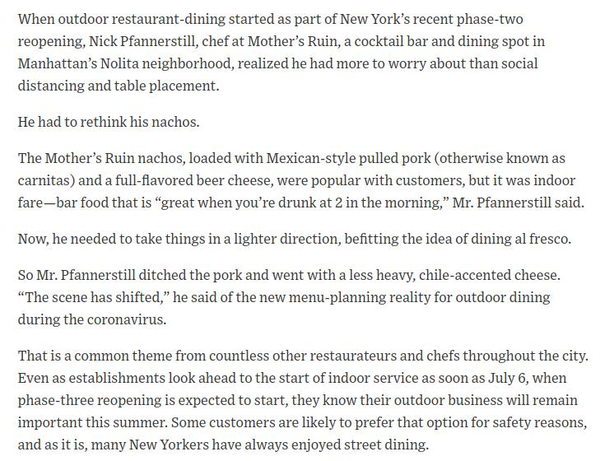

In [3]:
nb_setup.images_hconcat(["NLP_images/wsj_text.jpeg"], width=600)

## AWS Textract Steps

1. Create a S3 bucket, use all lower case.
2. Upload a JPEG file.
3. Call it from Textract using a simple command line interface.

```
[default]
aws_access_key_id = AKIAYNQOKXOFYHNEWHSWJ
aws_secret_access_key = dSwPa0krngewWudGcyUgZ219XVZ0IzpMe3LO3ojzP56
```

Textract returns a JSON structure as shown below.

In [4]:
text = !aws textract analyze-document --document '{"S3Object":{"Bucket":"nlp-course-sanjivda","Name":"wsj_text.jpeg"}}' --feature-types '["TABLES","FORMS"]'

text

['/bin/bash: line 1: aws: command not found']

## Examine the text fields

In [5]:
f = text.fields()
f

[['/bin/bash:', 'line', '1:', 'aws:', 'command', 'not', 'found']]

## Tokenize the text in the JSON structure

In [6]:
res = [j[1:] for j in f if j[0]=='"Text":']
print(res)

[]


## Reconstruct the text

In [7]:
res2 = [" ".join(j) for j in res]
res2 = " ".join(res2)
print(res2)
print('------------')
res2 = re.sub('", "',' ',res2)
print(res2)


------------

